# Reqularization Techniques Exercises

In [1]:
from predictive_modeling.linear_model_selection.Examples import fit_linear_reg
%pip install numpy pandas matplotlib scikit-learn statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

## Exercise 6.1

In this exercise, we will look at the College data set which tracks demographic characteristics of college applications in the USA. Our goal is to predict the number of applications (`Apps`) received by using the other
variables in the dataset

In [3]:
df = pd.read_csv('../data/college.csv', index_col = 0)

# Replace categorical with numerical dummy values:
df = pd.get_dummies(data = df, columns = ['Private'], drop_first = True)

df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,True
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,True
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,True
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,True
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,True


### a) Split the data set into a training and a test set

In [4]:
from sklearn.model_selection import train_test_split

x = df.drop(columns='Apps') 
y = df['Apps']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

### b) Fit linear model using least squares and best subset selection

Fit a linear model using least squares and best subset selection on the training
set, and report on the test error obtained.

In [18]:
import sys

if ".." not in sys.path:
    sys.path.insert(0, "..")

In [21]:
from linear_model_selection import fit_linear_reg

model = fit_linear_reg(x_test, y_test)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

### c) Fit ridge regression model using cross-validation

Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report on the test error obtained.

In [7]:
from sklearn.linear_model import RidgeCV

n = 100
alphas = np.exp(np.linspace(-10, 10, n))

model = RidgeCV(alphas, store_cv_results = True).fit(x_train, y_train)

plot_x = np.log(alphas)
plot_y = np.mean(model.cv_results_, axis = 0)

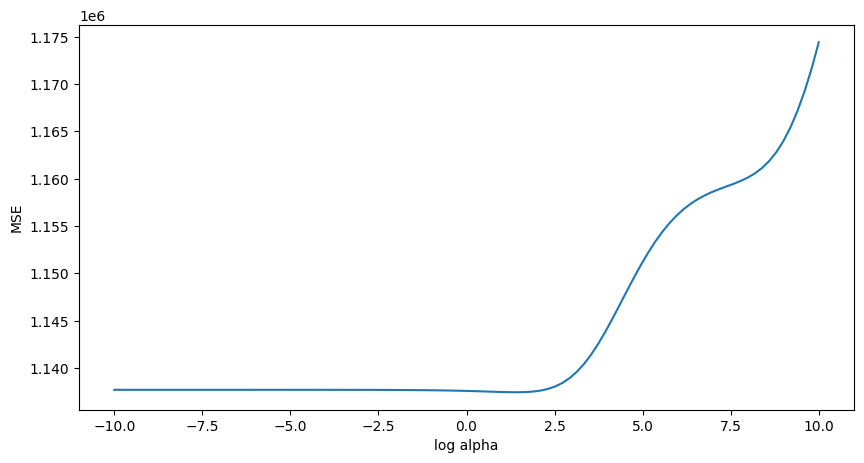

In [8]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(plot_x, plot_y)
plt.xlabel("log alpha")
plt.ylabel("MSE")
plt.show()

In [9]:
print("Best log(alpha) =", np.round(np.log(model.alpha_), 3))
print("Best alpha =", np.round(model.alpha_, 3))

Best log(alpha) = 1.313
Best alpha = 3.718


In [10]:
y_pred = model.predict(x_test)
mse = np.mean((y_pred - y_test) ** 2)

In [11]:
print("mse =", np.round(mse, 3))

mse = 1812961.575
